# Analisis con Pandas y Kaggle (Core)

El objetivo de esta actividad es poner en práctica todos los conocimientos adquiridos sobre Pandas a través del análisis completo de un dataset. Los estudiantes deben aplicar técnicas de carga, exploración, limpieza, transformación, y agregación de datos para extraer insights valiosos. La actividad no incluye visualización de datos, enfocándose únicamente en el análisis y manipulación de datos con Pandas.

### Instrucciones

### Preparación del Entorno
* Asegúrate de tener instalado Pandas en tu entorno de trabajo.
* Descarga el archivo dataset.csv desde Kaggle. Elige un dataset que te interese y que no incluya visualización de datos. Algunas sugerencias pueden ser datasets relacionados con ventas, compras, productos, etc.
### Cargar los Datos
* Carga el archivo CSV en un DataFrame de Pandas.
* Muestra las primeras 10 filas del DataFrame para confirmar que los datos se han cargado correctamente.
### Exploración Inicial de los Datos
* Muestra las últimas 5 filas del DataFrame.
* Utiliza el método info() para obtener información general sobre el DataFrame, incluyendo el número de entradas, nombres de las columnas, tipos de datos y memoria utilizada.
* Genera estadísticas descriptivas del DataFrame utilizando el método describe().
### Limpieza de Datos
* Identifica y maneja los datos faltantes utilizando técnicas apropiadas (relleno con valores estadísticos, interpolación, eliminación, etc.).
* Corrige los tipos de datos si es necesario (por ejemplo, convertir cadenas a fechas).
* Elimina duplicados si los hay.
### Transformación de Datos
* Crea nuevas columnas basadas en operaciones con las columnas existentes (por ejemplo, calcular ingresos a partir de ventas y precios).
* Normaliza o estandariza columnas si es necesario.
* Clasifica los datos en categorías relevantes.
### Análisis de Datos
* Realiza agrupaciones de datos utilizando groupby para obtener insights específicos (por ejemplo, ventas por producto, ventas por región, etc.).
* Aplica funciones de agregación como sum, mean, count, min, max, std, y var.
* Utiliza el método apply para realizar operaciones más complejas y personalizadas.
### Documentación
*Documenta claramente cada paso del análisis, explicando qué se hizo y por qué se hizo.
* Asegúrate de que el código sea legible y esté bien comentado.

In [57]:
import pandas as pd
import numpy as np

In [58]:
df = pd.read_csv('../Data/EconomicData.csv')

Primeras impresiones

In [59]:
df.head(10)

,Region,GDP Per Capita,Gini Index,Gross Domestic Product (GDP)
0,Afghanistan,479,NaN,NaN
1,Albania,$4.2K,0.332,$18.9B
2,Algeria,$3.5K,0.276,$191.9B
3,Andorra,$35.7K,NaN,$3.4B
4,Angola,$2.9K,0.513,$106.7B
5,Anguilla,$21.2K,NaN,NaN
6,Antigua and Barbuda,$15.5K,NaN,$1.8B
7,Argentina,$11.9K,0.429,$632.8B
8,Armenia,$3.8K,0.299,$19.5B
9,Aruba,$25.1K,NaN,NaN


In [60]:
df['GDP Per Capita'] = df['GDP Per Capita'].replace({'\$': '', 'K': '000', 'M': '000000'}, regex=True)

<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:1: SyntaxWarning: invalid escape sequence '\$'
C:\Users\guill\AppData\Local\Temp\ipykernel_14736\3945127758.py:1: SyntaxWarning: invalid escape sequence '\$'
  df['GDP Per Capita'] = df['GDP Per Capita'].replace({'\$': '', 'K': '000', 'M': '000000'}, regex=True)


In [61]:
df['GDP Per Capita'] = pd.to_numeric(df['GDP Per Capita'], errors='coerce')

In [62]:
df.head()

,Region,GDP Per Capita,Gini Index,Gross Domestic Product (GDP)
0,Afghanistan,479.0,NaN,NaN
1,Albania,4.2,0.332,$18.9B
2,Algeria,3.5,0.276,$191.9B
3,Andorra,35.7,NaN,$3.4B
4,Angola,2.9,0.513,$106.7B


In [63]:
from sklearn.linear_model import LinearRegression

In [64]:

# Crear un modelo de regresión para predecir los valores faltantes
model = LinearRegression()

# Seleccionar las filas sin valores nulos para entrenar el modelo
train_data = df.dropna(subset=['GDP Per Capita', 'Gini Index'])
X_train = train_data[['GDP Per Capita']]
y_train = train_data['Gini Index']

# Entrenar el modelo
model.fit(X_train, y_train)


LinearRegression()

In [65]:

# Predecir los valores faltantes
missing_data = df[df['Gini Index'].isnull()]
X_missing = missing_data[['GDP Per Capita']]
df.loc[df['Gini Index'].isnull(), 'Gini Index'] = model.predict(X_missing)


In [66]:
df["Gini Index"].isnull().sum()

0

In [67]:
df['Gross Domestic Product (GDP)'] = df['Gross Domestic Product (GDP)'].replace({'\$': '', 'K': '000', 'M': '000000', 'B': '00000000'}, regex=True)


<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:1: SyntaxWarning: invalid escape sequence '\$'
C:\Users\guill\AppData\Local\Temp\ipykernel_14736\245822940.py:1: SyntaxWarning: invalid escape sequence '\$'
  df['Gross Domestic Product (GDP)'] = df['Gross Domestic Product (GDP)'].replace({'\$': '', 'K': '000', 'M': '000000', 'B': '00000000'}, regex=True)


In [68]:
df['Gross Domestic Product (GDP)'] = pd.to_numeric(df['Gross Domestic Product (GDP)'], errors='coerce')

In [69]:

# Crear un modelo de regresión para predecir los valores faltantes
model = LinearRegression()

# Seleccionar las filas sin valores nulos para entrenar el modelo
train_data = df.dropna(subset=['GDP Per Capita', 'Gross Domestic Product (GDP)'])
X_train = train_data[['GDP Per Capita']]
y_train = train_data['Gross Domestic Product (GDP)']

# Entrenar el modelo
model.fit(X_train, y_train)


LinearRegression()

In [70]:
# Predecir los valores faltantes
missing_data = df[df['Gross Domestic Product (GDP)'].isnull()]
X_missing = missing_data[['GDP Per Capita']]
df.loc[df['Gross Domestic Product (GDP)'].isnull(), 'Gross Domestic Product (GDP)'] = model.predict(X_missing)


In [71]:
df["Gross Domestic Product (GDP)"].isnull().sum()

0

In [72]:
df.isnull().sum()

Region                          0
GDP Per Capita                  0
Gini Index                      0
Gross Domestic Product (GDP)    0
dtype: int64

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Region                        209 non-null    object 
 1   GDP Per Capita                209 non-null    float64
 2   Gini Index                    209 non-null    float64
 3   Gross Domestic Product (GDP)  209 non-null    float64
dtypes: float64(3), object(1)
memory usage: 6.7+ KB


In [84]:
df.describe()

,GDP Per Capita,Gini Index,Gross Domestic Product (GDP)
count,209.000000,209.000000,209.000000
mean,108.856938,0.382660,170.274189
std,224.858179,0.069771,208.662959
min,1.000000,0.246000,-47.648967
25%,3.800000,0.337000,19.100000
50%,12.600000,0.380349,89.000000
75%,44.100000,0.415000,197.389281
max,973.000000,0.630000,991.100000


In [85]:
df.head()

,Region,GDP Per Capita,Gini Index,Gross Domestic Product (GDP)
0,Afghanistan,479.0,0.391900,74.831479
1,Albania,4.2,0.332000,18.900000
2,Algeria,3.5,0.276000,191.900000
3,Andorra,35.7,0.380833,3.400000
4,Angola,2.9,0.513000,106.700000


In [92]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
df['Cluster'] = kmeans.fit_predict(df[['GDP Per Capita', 'Gini Index', 'Gross Domestic Product (GDP)']])


c:\Users\guill\anaconda3\envs\mitic\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


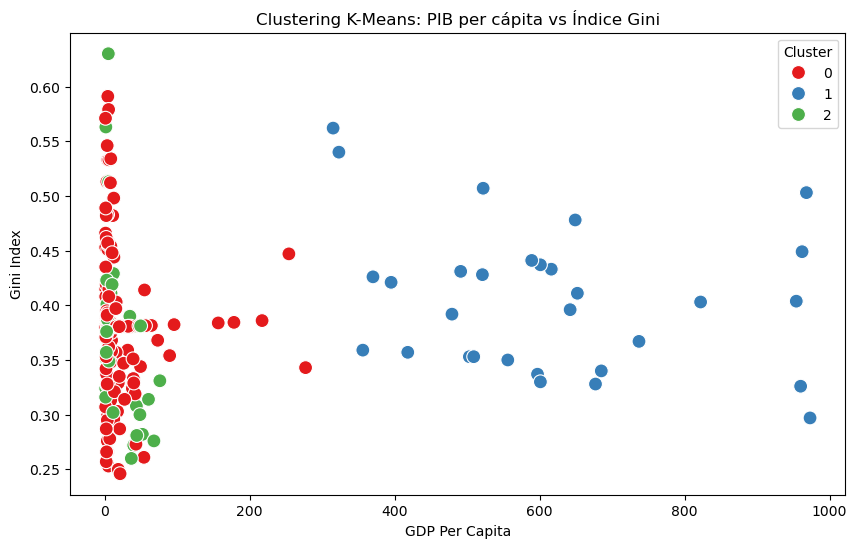

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un gráfico de dispersión con dos variables
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GDP Per Capita', y='Gini Index', hue='Cluster', data=df, palette='Set1', s=100)

# Añadir títulos y etiquetas
plt.title('Clustering K-Means: PIB per cápita vs Índice Gini')
plt.xlabel('GDP Per Capita')
plt.ylabel('Gini Index')
plt.legend(title='Cluster')
plt.show()

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt

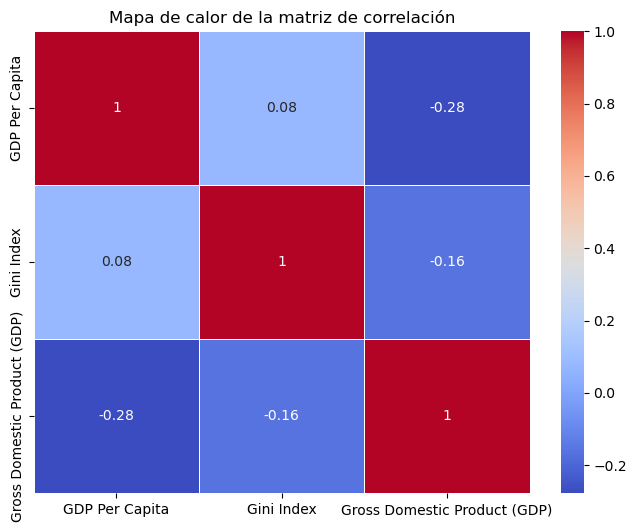

In [91]:
# Calcular la matriz de correlación
correlation_matrix = df[['GDP Per Capita', 'Gini Index', 'Gross Domestic Product (GDP)']].corr()

# Crear el mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Mapa de calor de la matriz de correlación')
plt.show()


In [83]:
# Ventas mínimas y máximas por Region
GDP_Min = df.groupby('Region').min()
GDP_Max = df.groupby('Region').max()
print("GDP Min")
print(GDP_Min)
print("-------------------")
print("GDP Max")
print(GDP_Max)

GDP Min
             GDP Per Capita  Gini Index  Gross Domestic Product (GDP)
Region                                                               
Afghanistan           479.0    0.391900                     74.831479
Albania                 4.2    0.332000                     18.900000
Algeria                 3.5    0.276000                    191.900000
Andorra                35.7    0.380833                      3.400000
Angola                  2.9    0.513000                    106.700000
...                     ...         ...                           ...
Venezuela              10.1    0.448000                    195.739018
Vietnam                 2.1    0.357000                    408.800000
Yemen                 737.0    0.367000                      8.305258
Zambia                  1.0    0.571000                     29.800000
Zimbabwe              968.0    0.503000                     20.700000

[208 rows x 3 columns]
-------------------
GDP Max
             GDP Per Capita  G

In [75]:
grouped = df.groupby('GDP Per Capita')

SyntaxError: invalid syntax (455883492.py, line 1)

In [78]:
# Aplicar múltiples funciones de agregación a 'Region' agrupadas por 'Producto'
agg_result = df.groupby('Region')['Gini Index'].agg(['sum', 'mean', 'count'])
print(agg_result)

                  sum      mean  count
Region                                
Afghanistan  0.391900  0.391900      1
Albania      0.332000  0.332000      1
Algeria      0.276000  0.276000      1
Andorra      0.380833  0.380833      1
Angola       0.513000  0.513000      1
...               ...       ...    ...
Venezuela    0.448000  0.448000      1
Vietnam      0.357000  0.357000      1
Yemen        0.367000  0.367000      1
Zambia       0.571000  0.571000      1
Zimbabwe     0.503000  0.503000      1

[208 rows x 3 columns]


In [55]:
# Desviación estándar de las ventas por tienda
desviacion_estandar_GDP_Per_Capita = df.groupby('Region')['Gini Index'].std()
print('La desviacion estandar por ventas')
print(desviacion_estandar_GDP_Per_Capita)

La desviacion estandar por ventas
Region
Afghanistan   NaN
Albania       NaN
Algeria       NaN
Andorra       NaN
Angola        NaN
               ..
Venezuela     NaN
Vietnam       NaN
Yemen         NaN
Zambia        NaN
Zimbabwe      NaN
Name: Gini Index, Length: 208, dtype: float64


In [53]:
df.head(20)

,Region,GDP Per Capita,Gini Index,Gross Domestic Product (GDP),GDP_Porcentaje
0,Afghanistan,479.0,0.391900,74.831479,100.000000
1,Albania,4.2,0.332000,18.900000,20.000000
2,Algeria,3.5,0.276000,191.900000,50.000000
3,Andorra,35.7,0.380833,3.400000,100.000000
4,Angola,2.9,0.513000,106.700000,50.000000
5,Anguilla,21.2,0.380472,192.876844,100.000000
6,Antigua and Barbuda,15.5,0.380329,1.800000,50.000000
7,Argentina,11.9,0.429000,632.800000,100.000000
8,Armenia,3.8,0.299000,19.500000,33.333333
9,Aruba,25.1,0.380569,191.871215,100.000000
